In [47]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

In [48]:
# Load in CSVs of classified aufeis pixels for poly_01 on 07/19/2025
auf_rf_0719 = pd.read_csv("../../../../shared_space/SWOT_Aufeis/joined_SWOT_ice_mask/poly_01_20250719_aufeis_random_forest.csv")
auf_tree_0719 = pd.read_csv("../../../../shared_space/SWOT_Aufeis/joined_SWOT_ice_mask/poly_01_20250719_aufeis_decision_tree.csv")
auf_mlp_0719 = pd.read_csv("../../../../shared_space/SWOT_Aufeis/joined_SWOT_ice_mask/poly_01_20250719_aufeis_mlp.csv")

In [49]:
# Load in CSVs of classified aufeis for test data dates
auf_rf_710 = pd.read_csv("../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/poly_01_20250710_aufeis_random_forest.csv")
auf_rf_720 = pd.read_csv("../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/poly_01_20250720_aufeis_random_forest.csv")
auf_rf_729 = pd.read_csv("../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/poly_01_20250729_aufeis_random_forest.csv")
auf_rf_822 = pd.read_csv("../../../../shared_space/SWOT_Aufeis/SWOT_PIXC_data/poly_01_20250822_aufeis_random_forest.csv")

In [50]:
# Calculate area of aufeis classified pixels for poly_01 on 07/19/2025 (in m^2)
area_rf_0719 = np.sum(auf_rf_0719['pixel_area'])
print("poly_01 07/19 Random forest area (m^2):", area_rf_0719)
area_tree_0719 = np.sum(auf_tree_0719['pixel_area'])
print("poly_01 07/19 Decision tree area (m^2):", area_tree_0719)
area_mlp_0719 = np.sum(auf_mlp_0719['pixel_area'])
print("poly_01 07/19 Multilayer perceptron area (m^2):", area_mlp_0719)

poly_01 07/19 Random forest area (m^2): 12220736.61497
poly_01 07/19 Decision tree area (m^2): 12224348.019559998
poly_01 07/19 Multilayer perceptron area (m^2): 13182251.296440002


In [51]:
# Calculate area of aufeis classified pixels for poly_01 on test dates (in m^2)
area_rf_710 = np.sum(auf_rf_710['pixel_area'])
print("poly_01 07/10 Random forest area (m^2):", area_rf_710)

area_rf_720 = np.sum(auf_rf_720['pixel_area'])
print("poly_01 07/20 Random forest area (m^2):", area_rf_720)

area_rf_729 = np.sum(auf_rf_729['pixel_area'])
print("poly_01 07/29 Random forest area (m^2):", area_rf_729)

area_rf_822 = np.sum(auf_rf_822['pixel_area'])
print("poly_01 08/22 Random forest area (m^2):", area_rf_822)

poly_01 07/10 Random forest area (m^2): 5936448.8153099995
poly_01 07/20 Random forest area (m^2): 8455605.09584
poly_01 07/29 Random forest area (m^2): 1305235.0644800002
poly_01 08/22 Random forest area (m^2): 7638234.8553


In [74]:
# Create dataframe of aufeis areas

date = [datetime(2025, 7, 10),
        datetime(2025, 7, 19),
       datetime(2025, 7, 20),
       datetime(2025, 7, 29),
       datetime(2025, 8, 22)]


area = [area_rf_710,
       area_rf_0719,
       area_rf_720,
       area_rf_729,
       area_rf_822]

aufeis_area_df = pd.DataFrame({'Date': date,'Area (m^2)': area})

aufeis_area_df

,Date,Area (m^2)
0,2025-07-10,5.936449e+06
1,2025-07-19,1.222074e+07
2,2025-07-20,8.455605e+06
3,2025-07-29,1.305235e+06
4,2025-08-22,7.638235e+06


## Plot with Sentinel-2 timeseries

In [53]:
# load S2 data

df = pd.read_csv("data/aufeis_extent.csv", parse_dates=["date"])
df = df.drop(columns="Unnamed: 0")

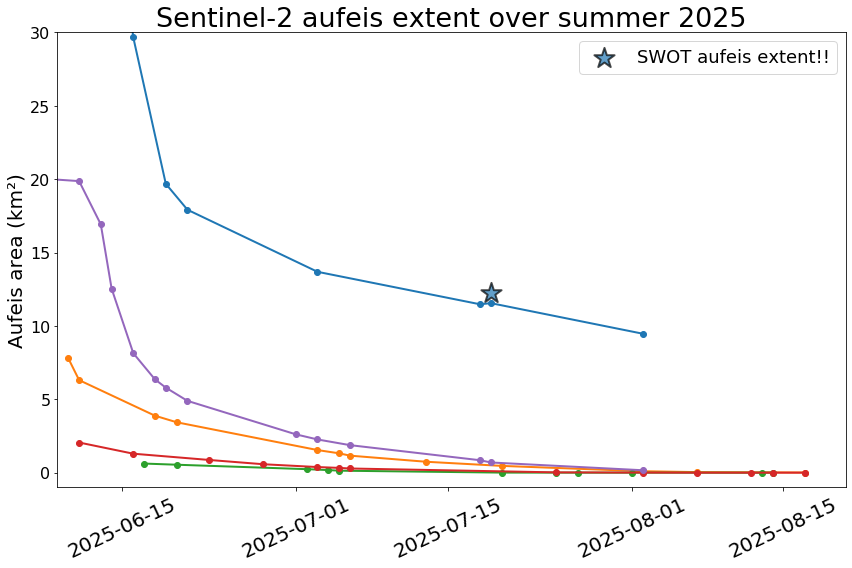

In [54]:
# convert m2 area to km2
df["area_km2"] = df["area"] / 1e6

# plot!!
plt.figure(figsize=(12,8))

for p in [1, 2, 3, 4, 5]:
    mask = df["polygon"] == p
    # line plot with markers for the points
    plt.plot(df["date"][mask], df["area_km2"][mask],
#              label=f"Polygon {p}",
             marker="o", markersize=6, linewidth=2)

# janky add for the SWOT point from the random forest
plt.scatter(pd.Timestamp("2025-07-19"), 12.22074, marker='*', facecolors="#1f77b4", 
            edgecolors='black', linewidths=2, s=450, label="SWOT aufeis extent!!", alpha = 0.7)

plt.title("Sentinel-2 aufeis extent over summer 2025", fontsize=27)
plt.ylabel("Aufeis area (km²)", fontsize=20)
plt.xticks(rotation=25, fontsize=20)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.xlim(left=pd.Timestamp("2025-06-09"))
plt.ylim(-1, 30)
plt.tight_layout()
plt.show()


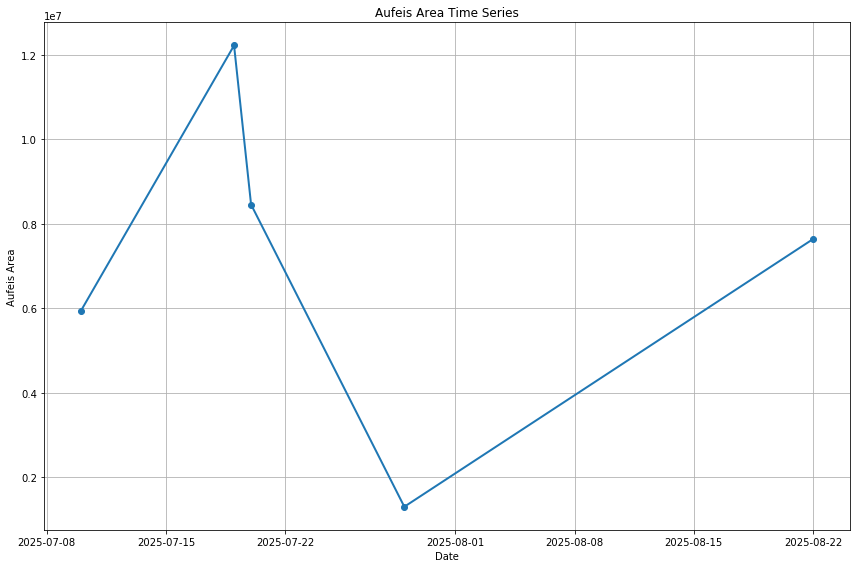

In [56]:
# Plot timeseries of SWOT aufeis extent

plt.figure(figsize=(12,8))
plt.plot(aufeis_area_df['Date'], aufeis_area_df['Area'], marker='o', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Aufeis Area')
plt.title('Aufeis Area Time Series')
plt.grid(True)
plt.tight_layout()
plt.show()

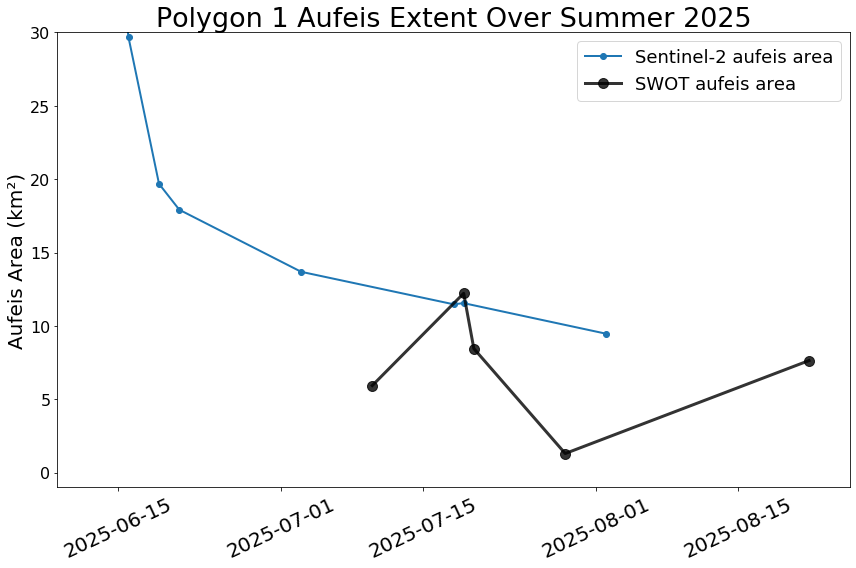

In [46]:
# Make combined plot of Sentinel-2 and SWOT
aufeis_area_df["area_km2"] = aufeis_area_df["Area"] / 1e6
df["area_km2"] = df["area"] / 1e6

plt.figure(figsize=(12, 8))

# --- Only show Polygon 1 ---
mask = df["polygon"] == 1
plt.plot(df["date"][mask],
         df["area_km2"][mask],
         marker="o",
         markersize=6,
         linewidth=2,
         label="Sentinel-2 aufeis area")

# --- SWOT line (aufeis_area_df) ---
plt.plot(
    aufeis_area_df["Date"],
    aufeis_area_df["area_km2"],
    marker="o",
    markersize=10,
    linewidth=3,
    color="black",
    label="SWOT aufeis area",
    alpha=0.8)

plt.title("Polygon 1 Aufeis Extent Over Summer 2025", fontsize=27)
plt.ylabel("Aufeis Area (km²)", fontsize=20)
plt.xticks(rotation=25, fontsize=20)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.xlim(left=pd.Timestamp("2025-06-09"))
plt.ylim(-1, 30)
plt.tight_layout()
plt.show()

In [75]:
# Calculate volume change between dates , assuming porosity of 0% and assuming water elevation is 0 on each date

# 7/10-7/19
elevation_rf_710 = np.mean(auf_rf_710['elevation'])
elevation_rf_719 = np.mean(auf_rf_0719['elevation'])
volume_710 = area_rf_710 * elevation_rf_710
volume_719 = area_rf_0719 * elevation_rf_719
vol_change_710_719 = volume_719 - volume_710

# 7/19-7/20
elevation_rf_720 = np.mean(auf_rf_720['elevation'])
volume_720 = area_rf_720 * elevation_rf_720
vol_change_719_720 = volume_720 - volume_719

# 7/20-7/29
elevation_rf_729 = np.mean(auf_rf_729['elevation'])
volume_729 = area_rf_729 * elevation_rf_729
vol_change_720_729 = volume_729 - volume_720

# 7/29-8/22
elevation_rf_822 = np.mean(auf_rf_822['elevation'])
volume_822 = area_rf_822 * elevation_rf_822
vol_change_729_822 = volume_822 - volume_729

# Create dataframe of volume changes

dates = ['7/10/2025-7/19/2025',
        '7/19/2025-7/20/2025',
       '7/20/2025-7/29/2025',
       '7/29/2025-8/22/2025']


vol_changes = [vol_change_710_719,
       vol_change_719_720,
       vol_change_720_729,
       vol_change_729_822]

vol_changes_porosity0_df = pd.DataFrame({'Dates': dates,'Change in Aufeis Volume (m^3)': vol_changes})

vol_changes_porosity0_df

,Dates,Change in Aufeis Volume (m^3)
0,7/10/2025-7/19/2025,2.117888e+09
1,7/19/2025-7/20/2025,-1.239223e+09
2,7/20/2025-7/29/2025,-2.445030e+09
3,7/29/2025-8/22/2025,2.146927e+09


In [76]:
# Calculate volume change between dates , assuming porosity of 20% and assuming water elevation is 0 on each date

# 7/10-7/19
elevation_rf_710 = np.mean(auf_rf_710['elevation'])
elevation_rf_719 = np.mean(auf_rf_0719['elevation'])
volume_710 = area_rf_710 * elevation_rf_710
volume_710 = 0.8 * volume_710
volume_719 = area_rf_0719 * elevation_rf_719
volume_719 = 0.8 * volume_719
vol_change_710_719 = volume_719 - volume_710

# 7/19-7/20
elevation_rf_720 = np.mean(auf_rf_720['elevation'])
volume_720 = area_rf_720 * elevation_rf_720
volume_720 = 0.8 * volume_720
vol_change_719_720 = volume_720 - volume_719

# 7/20-7/29
elevation_rf_729 = np.mean(auf_rf_729['elevation'])
volume_729 = area_rf_729 * elevation_rf_729
volume_729 = 0.8 * volume_729
vol_change_720_729 = volume_729 - volume_720

# 7/29-8/22
elevation_rf_822 = np.mean(auf_rf_822['elevation'])
volume_822 = area_rf_822 * elevation_rf_822
volume_822 = 0.8 * volume_822
vol_change_729_822 = volume_822 - volume_729

# Create dataframe of volume changes

dates = ['7/10/2025-7/19/2025',
        '7/19/2025-7/20/2025',
       '7/20/2025-7/29/2025',
       '7/29/2025-8/22/2025']


vol_changes = [vol_change_710_719,
       vol_change_719_720,
       vol_change_720_729,
       vol_change_729_822]

vol_changes_porosity20_df = pd.DataFrame({'Dates': dates,'Change in Aufeis Volume (m^3)': vol_changes})

vol_changes_porosity20_df

,Dates,Change in Aufeis Volume (m^3)
0,7/10/2025-7/19/2025,1.694311e+09
1,7/19/2025-7/20/2025,-9.913781e+08
2,7/20/2025-7/29/2025,-1.956024e+09
3,7/29/2025-8/22/2025,1.717541e+09


In [89]:
# Combine volume change dataframes for both porosities
vol_changes = pd.merge(vol_changes_porosity20_df, vol_changes_porosity0_df, on='Dates', how='inner')
vol_changes = vol_changes.rename(columns={'Change in Aufeis Volume (m^3)_x': '20% Porosity Volume Change (m^3)', 'Change in Aufeis Volume (m^3)_y': '0% Porosity Volume Change (m^3)'})
vol_changes['20% Porosity Volume Change (km³)'] = vol_changes['20% Porosity Volume Change (m^3)'] / 1e9
vol_changes['0% Porosity Volume Change (km³)'] = vol_changes['0% Porosity Volume Change (m^3)'] / 1e9
vol_changes = vol_changes.drop(columns=['20% Porosity Volume Change (m^3)', '0% Porosity Volume Change (m^3)'])
vol_changes

,Dates,20% Porosity Volume Change (km³),0% Porosity Volume Change (km³)
0,7/10/2025-7/19/2025,1.694311,2.117888
1,7/19/2025-7/20/2025,-0.991378,-1.239223
2,7/20/2025-7/29/2025,-1.956024,-2.445030
3,7/29/2025-8/22/2025,1.717541,2.146927


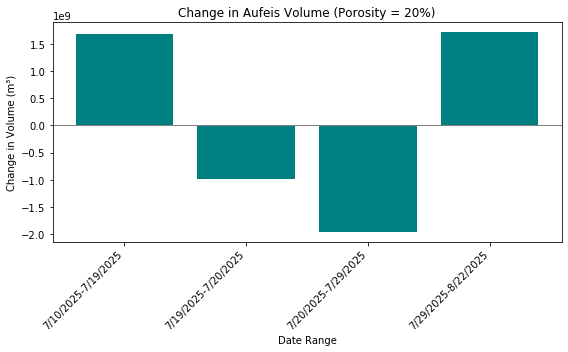

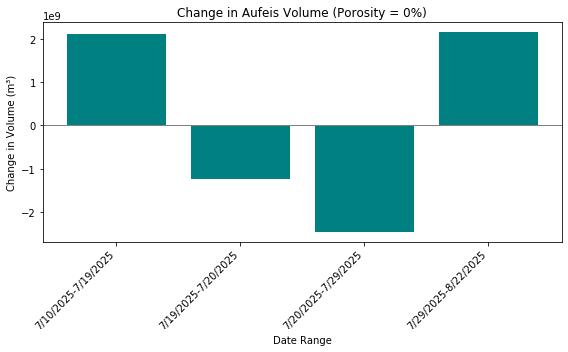

In [87]:
# Bar charts for aufeis volume changes for both porosities

plt.figure(figsize=(8, 5))
plt.bar(vol_changes_porosity20_df['Dates'],
        vol_changes_porosity20_df['Change in Aufeis Volume (m^3)'],
        color='teal')

plt.title('Change in Aufeis Volume (Porosity = 20%)')
plt.xlabel('Date Range')
plt.ylabel('Change in Volume (m³)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linewidth=1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(vol_changes_porosity0_df['Dates'],
        vol_changes_porosity0_df['Change in Aufeis Volume (m^3)'],
        color='teal')

plt.title('Change in Aufeis Volume (Porosity = 0%)')
plt.xlabel('Date Range')
plt.ylabel('Change in Volume (m³)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linewidth=1)
plt.tight_layout()
plt.show()

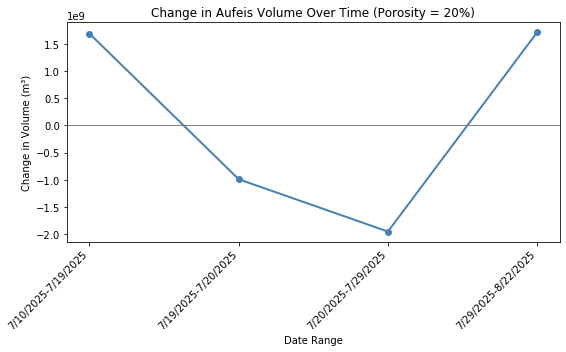

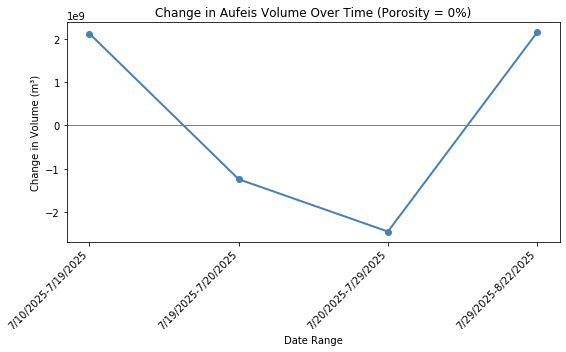

In [88]:
# Line graphs of aufeis volume changes for both porosities

plt.figure(figsize=(8, 5))
plt.plot(vol_changes_porosity20_df['Dates'],
         vol_changes_porosity20_df['Change in Aufeis Volume (m^3)'],
         marker='o', color='steelblue', linewidth=2)

plt.title('Change in Aufeis Volume Over Time (Porosity = 20%)')
plt.xlabel('Date Range')
plt.ylabel('Change in Volume (m³)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linewidth=1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(vol_changes_porosity0_df['Dates'],
         vol_changes_porosity0_df['Change in Aufeis Volume (m^3)'],
         marker='o', color='steelblue', linewidth=2)

plt.title('Change in Aufeis Volume Over Time (Porosity = 0%)')
plt.xlabel('Date Range')
plt.ylabel('Change in Volume (m³)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linewidth=1)
plt.tight_layout()
plt.show()